In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from function import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [3]:
df = pd.read_csv('data/train_set.csv')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
label = pd.read_csv('data/lables.csv')
label.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
df2 = pd.merge(df, label, on='id')
df2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [8]:
df2.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [9]:
df2['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [53]:
continous_var = df2.select_dtypes(exclude='object').columns
list(continous_var)

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

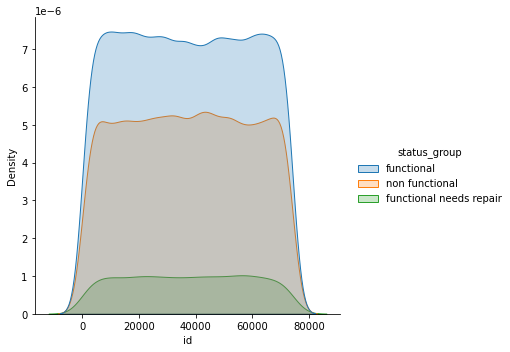

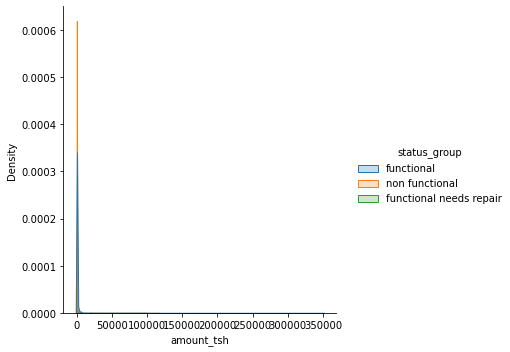

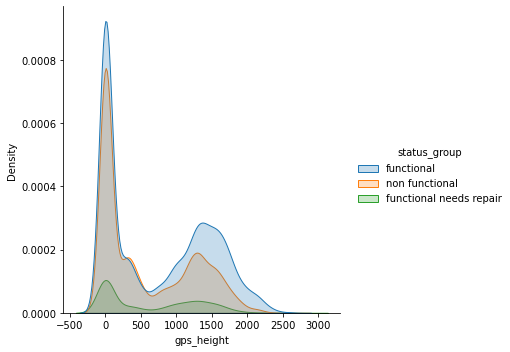

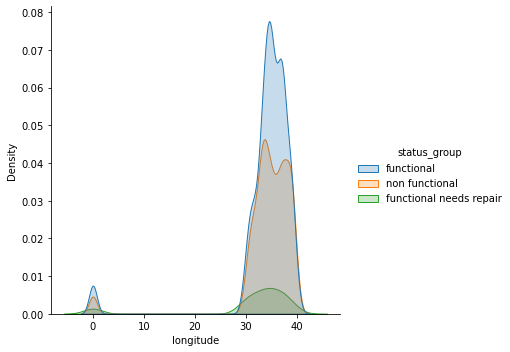

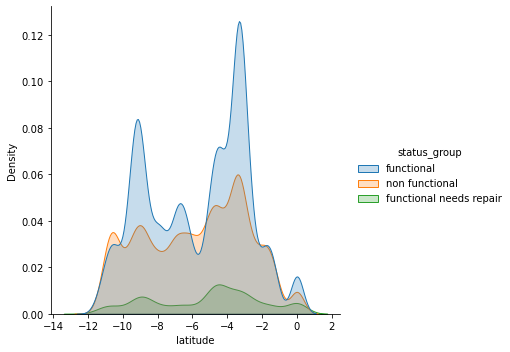

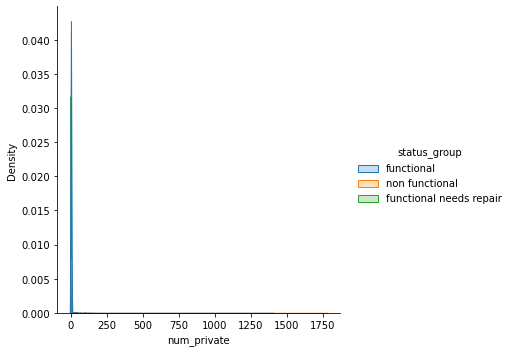

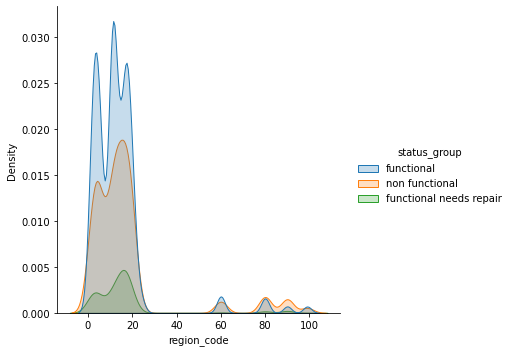

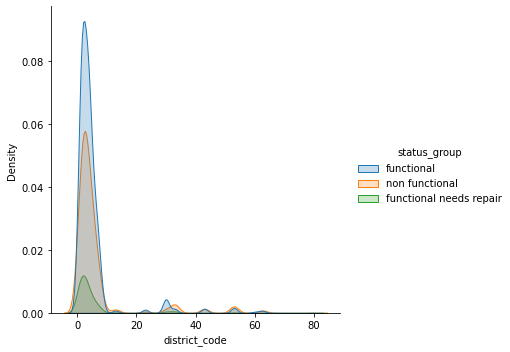

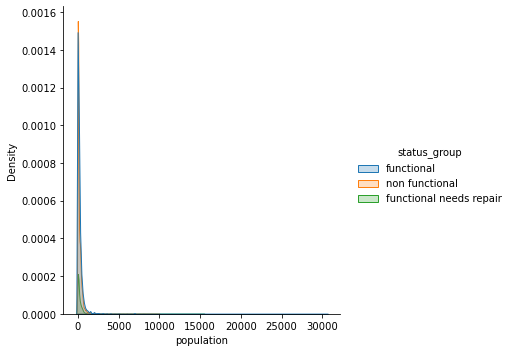

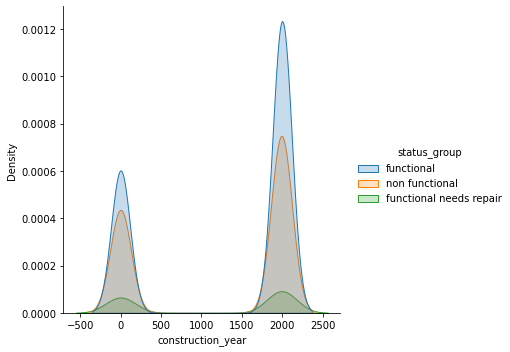

In [42]:
for column in continous_var:
    sns.displot(data=df2, x=column, hue=df2['status_group'], kind='kde', fill=True)
    plt.show()

In [54]:
categorical_var = df2.drop(columns=continous_var)
remove_ = ['date_recorded','funder','installer','wpt_name','subvillage',
                              'lga','ward','scheme_name']
categorical_var.drop(columns=remove_, axis=1, inplace=True)
categorical_var.head()

,basin,region,public_meeting,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Lake Nyasa,Iringa,True,GeoData Consultants Ltd,VWC,False,gravity,gravity,gravity,vwc,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,Lake Victoria,Mara,NaN,GeoData Consultants Ltd,Other,True,gravity,gravity,gravity,wug,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,Pangani,Manyara,True,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,Ruvuma / Southern Coast,Mtwara,True,GeoData Consultants Ltd,VWC,True,submersible,submersible,submersible,vwc,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,Lake Victoria,Kagera,True,GeoData Consultants Ltd,NaN,True,gravity,gravity,gravity,other,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [34]:
# df2['funder'].value_counts()

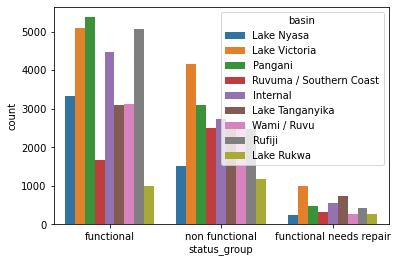

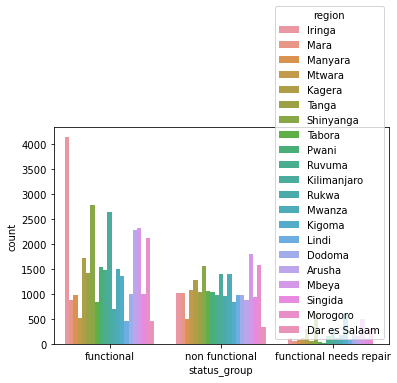

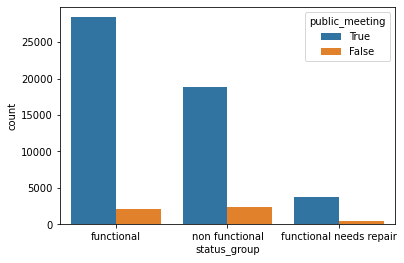

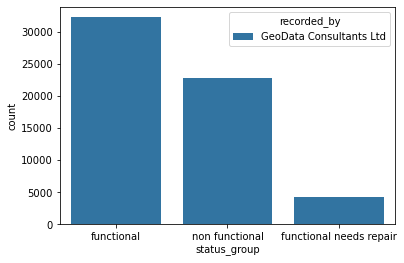

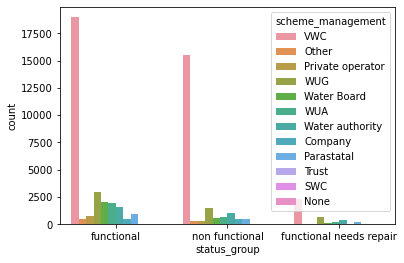

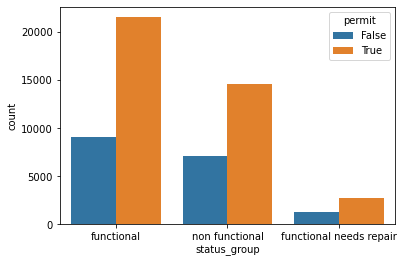

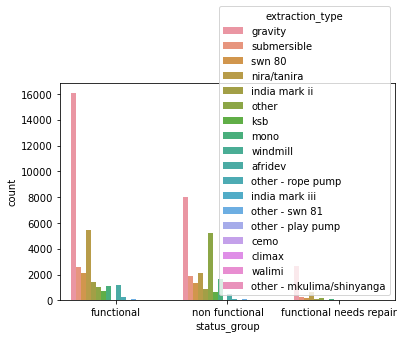

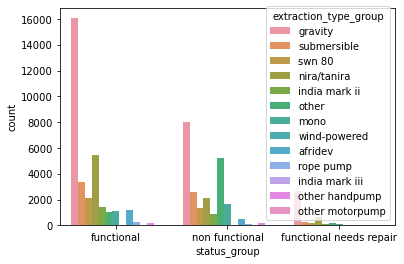

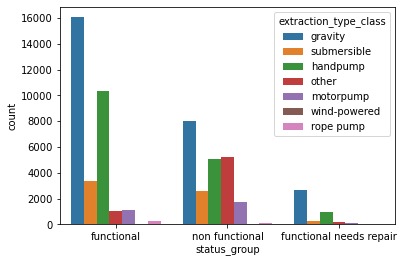

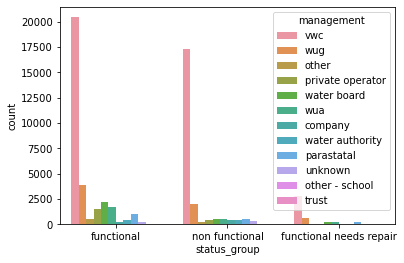

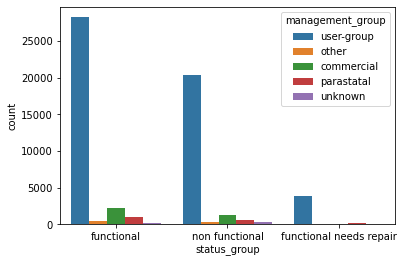

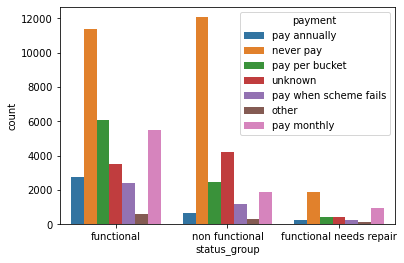

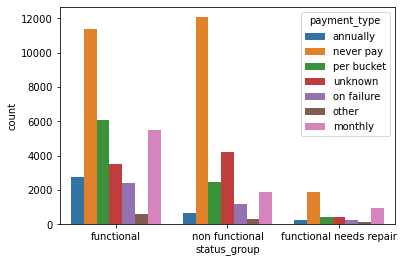

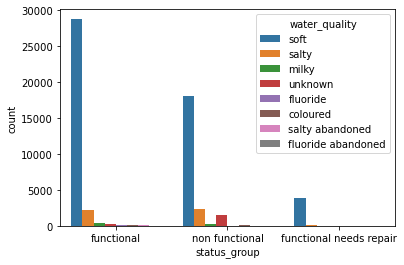

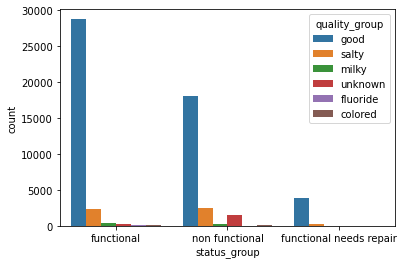

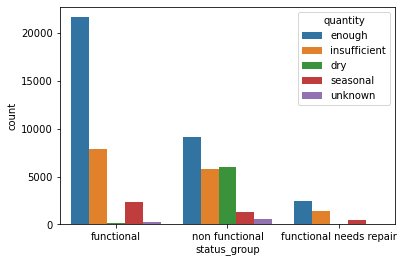

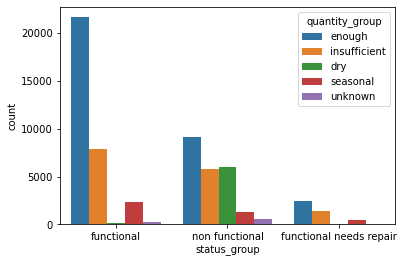

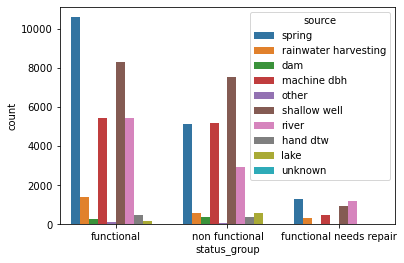

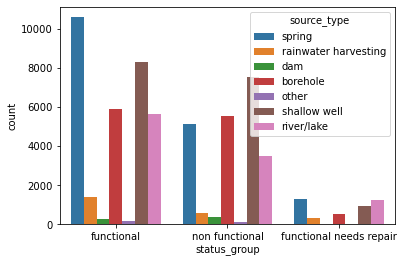

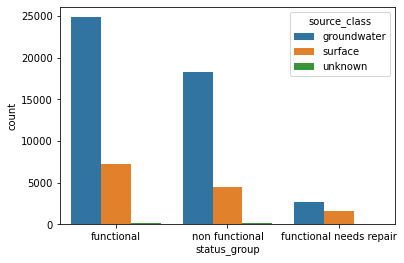

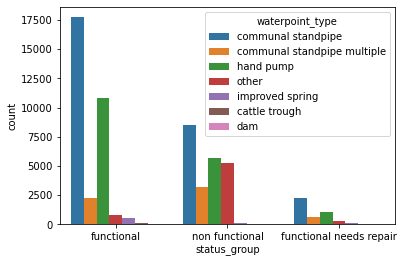

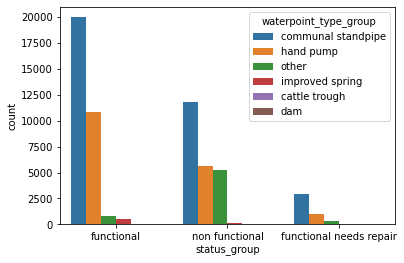

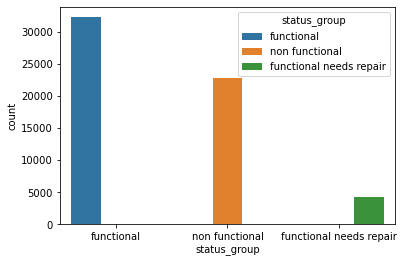

In [35]:
for column in categorical_var.columns:
    sns.countplot(data=df2, x=df2['status_group'], hue=column)
    plt.show()

In [55]:
remove_.extend(continous_var)
remove_.append('recorded_by')
remove_

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'subvillage',
 'lga',
 'ward',
 'scheme_name',
 'id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'recorded_by']

In [69]:
train = df2.drop(columns=remove_ , axis=1)
train.head()

,basin,region,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Lake Nyasa,Iringa,True,VWC,False,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,Lake Victoria,Mara,NaN,Other,True,gravity,gravity,gravity,wug,user-group,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,Pangani,Manyara,True,VWC,True,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,Ruvuma / Southern Coast,Mtwara,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,Lake Victoria,Kagera,True,NaN,True,gravity,gravity,gravity,other,other,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [70]:
train.isna().sum()

basin                       0
region                      0
public_meeting           3334
scheme_management        3877
permit                   3056
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
status_group                0
dtype: int64

In [71]:
train['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [72]:
train['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [73]:
train.dropna()

,basin,region,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Lake Nyasa,Iringa,True,VWC,False,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,Pangani,Manyara,True,VWC,True,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,Ruvuma / Southern Coast,Mtwara,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5,Pangani,Tanga,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,Internal,Shinyanga,True,VWC,True,swn 80,swn 80,handpump,vwc,user-group,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,Pangani,Kilimanjaro,True,Water Board,True,gravity,gravity,gravity,water board,user-group,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,Rufiji,Iringa,True,VWC,True,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,Rufiji,Mbeya,True,VWC,False,swn 80,swn 80,handpump,vwc,user-group,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,Rufiji,Dodoma,True,VWC,True,nira/tanira,nira/tanira,handpump,vwc,user-group,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [74]:
train['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [75]:
train['status_group'] = train['status_group'].map({'functional': 0, 'non functional': 1,
                                                   'functional needs repair': 2})
train.head()

,basin,region,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Lake Nyasa,Iringa,True,VWC,False,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,Lake Victoria,Mara,NaN,Other,True,gravity,gravity,gravity,wug,user-group,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,Pangani,Manyara,True,VWC,True,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,Ruvuma / Southern Coast,Mtwara,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,Lake Victoria,Kagera,True,NaN,True,gravity,gravity,gravity,other,other,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


In [76]:
X = train.drop(columns=['status_group'], axis=1)
y = train['status_group']

In [77]:
X = pd.get_dummies(X)
X.head()

,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
#SMOTE/need to solve clas imbalance - function is too high and ftnal needs repair is too small


In [53]:
def class_model(model, X_train, X_test, y_train, y_test):
    #do something to normalize/scale data here
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix Train:')
    plot_confusion_matrix(model, X_train, y_train, cmap=plt.cm.Blues)
    plt.show()
    
    print('Confusion Matrix Test:')
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()
    
    return model

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      6457
           1       0.77      0.75      0.76      4572
           2       0.36      0.38      0.37       851

    accuracy                           0.75     11880
   macro avg       0.64      0.64      0.64     11880
weighted avg       0.75      0.75      0.75     11880

Confusion Matrix Train:


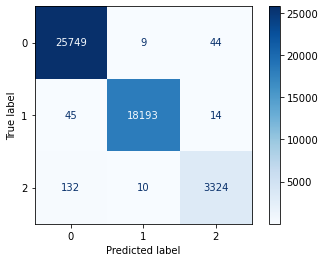

Confusion Matrix Test:


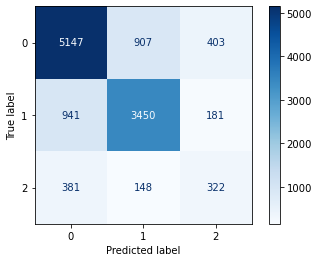

DecisionTreeClassifier()

In [54]:
d_tree = DecisionTreeClassifier(criterion='gini')
class_model(d_tree, X_train, X_test, y_train, y_test)